In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
%matplotlib inline

In [3]:
path = r'C:\Users\ms207\Desktop\CF\6\Data'

In [6]:
df = pd.read_csv(os.path.join(path, 'newupdated.csv'))

In [7]:
df.columns

Index(['month_date_yyyymm', 'cbsa_code', 'City', 'State ', 'alabama', 'alaska',
       'arizona', 'arkansas', 'california', 'colorado', 'connecticut ',
       'deleware', 'florida', 'georgia', 'hawaii', 'idaho', 'illinois',
       'indiana', 'kansas', 'kentucky', 'louisiana', 'maine', 'maryland',
       'massachusetts', 'michigan', 'minnessotta', 'mississippi', 'missouri',
       'montana ', 'nebraska', 'nevada', 'new hampshire', 'new jersey',
       'new mexico', 'new york', 'north carolina ', 'north dakota', 'ohio ',
       'oklahoma', 'oregon', 'pennsylvania', 'south carolina', 'south dakota',
       'tennessee', 'texas', 'utah ', 'vermont', 'virginia', 'washington',
       'west virgina', 'wisconsin', 'nielsen_hh_rank', 'hotness_rank',
       'hotness_rank_mm', 'hotness_rank_yy', 'hotness_score', 'supply_score',
       'demand_score', 'median_days_on_market', 'median_days_on_market_yy',
       'median_dom_vs_us', 'median_listing_price',
       'median_listing_price_vs_us'],
      d

In [8]:
df.head(20)

,month_date_yyyymm,cbsa_code,City,State,alabama,alaska,arizona,arkansas,california,colorado,...,hotness_rank_mm,hotness_rank_yy,hotness_score,supply_score,demand_score,median_days_on_market,median_days_on_market_yy,median_dom_vs_us,median_listing_price,median_listing_price_vs_us
0,202204,24860,"greenville-anderson-mauldin, sc",south carolina,0,0,0,0,0,0,...,-21,85,45.986622,34.448161,57.525084,36,-0.339450,2,349500,0.8224
1,202204,36260,"ogden-clearfield, ut",utah,0,0,0,0,0,0,...,-30,-94,51.337793,86.287625,16.387960,21,1.333333,-13,569000,1.3388
2,202204,23060,"fort wayne, in",Indiana,0,0,0,0,0,0,...,2,28,85.785953,79.264214,92.307692,24,-0.351351,-10,270000,0.6353
3,202204,29100,"la crosse-onalaska, wi-mn",Wisconsin,0,0,0,0,0,0,...,-3,8,95.986622,93.979933,97.993311,16,-0.319149,-18,340000,0.8000
4,202204,31420,"macon, ga",Georgia,0,0,0,0,0,0,...,-63,-12,31.772575,41.137124,22.408027,34,-0.093333,0,209000,0.4918
5,202204,21660,"eugene, or",Oregon,0,0,0,0,0,0,...,-9,17,50.000000,59.531773,40.468227,30,-0.220779,-4,489900,1.1527
6,202204,17860,"columbia, mo",Texas,0,0,0,0,0,0,...,-3,6,86.789298,95.317726,78.260870,15,-0.333333,-19,349000,0.8212
7,202204,19100,"dallas-fort worth-arlington, tx",Texas,0,0,0,0,0,0,...,-10,7,59.364548,76.254181,42.474916,25,-0.242424,-9,440000,1.0353
8,202204,24660,"greensboro-high point, nc",North Carolina,0,0,0,0,0,0,...,18,17,64.214047,45.819398,82.608696,33,-0.164557,-1,295000,0.6941
9,202204,13980,"blacksburg-christiansburg-radford, va",Virginia,0,0,0,0,0,0,...,-48,-61,47.324415,10.702341,83.946488,44,0.047619,10,325000,0.7647


In [9]:
df.shape

(300, 63)

In [11]:
df.rename(columns = {'connecticut ' : 'connecticut'}, inplace = True)

In [12]:
# Check for missing values

df.isnull().sum()

# No missing values to handle

month_date_yyyymm             0
cbsa_code                     0
City                          0
State                         0
alabama                       0
                             ..
median_days_on_market         0
median_days_on_market_yy      0
median_dom_vs_us              0
median_listing_price          0
median_listing_price_vs_us    0
Length: 63, dtype: int64

In [13]:
dups = df.duplicated()

In [14]:
dups.shape # No dups

(300,)

D:\ana\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='median_listing_price', ylabel='Density'>

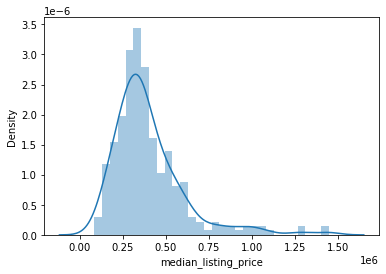

In [16]:
sns.distplot(df['median_listing_price'], bins=30) # Shows extreme values

In [17]:
df['median_listing_price'].mean() # Check the mean

400066.36666666664

In [18]:
df['median_listing_price'].median() # Check the median

349999.0

In [19]:
df['median_listing_price'].max() # Check the max

1450000

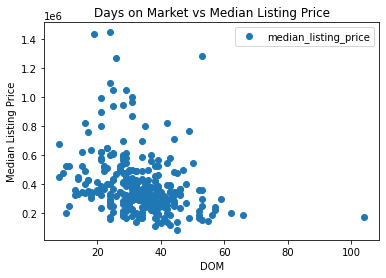

In [24]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df.plot(x = 'median_days_on_market', y='median_listing_price',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Days on Market vs Median Listing Price')  
plt.xlabel('DOM')  
plt.ylabel('Median Listing Price')  
plt.show()

In [25]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df['median_days_on_market'].values.reshape(-1,1)
y = df['median_listing_price'].values.reshape(-1,1)

In [26]:
X

array([[ 36],
       [ 21],
       [ 24],
       [ 16],
       [ 34],
       [ 30],
       [ 15],
       [ 25],
       [ 33],
       [ 44],
       [ 15],
       [ 52],
       [ 37],
       [ 43],
       [ 33],
       [ 28],
       [ 32],
       [ 46],
       [ 36],
       [ 37],
       [ 38],
       [ 44],
       [ 36],
       [  8],
       [ 31],
       [ 27],
       [ 24],
       [ 39],
       [ 28],
       [ 21],
       [ 29],
       [ 23],
       [ 29],
       [ 20],
       [ 28],
       [ 14],
       [ 47],
       [ 23],
       [ 25],
       [ 43],
       [ 33],
       [ 30],
       [ 24],
       [ 46],
       [ 52],
       [ 30],
       [ 45],
       [ 31],
       [ 38],
       [ 40],
       [ 39],
       [ 42],
       [ 31],
       [ 42],
       [ 34],
       [ 24],
       [ 13],
       [ 24],
       [ 39],
       [ 40],
       [ 39],
       [ 28],
       [ 29],
       [ 57],
       [ 44],
       [ 42],
       [ 34],
       [ 38],
       [ 45],
       [ 38],
       [ 31],
      

In [27]:
y

array([[ 349500],
       [ 569000],
       [ 270000],
       [ 340000],
       [ 209000],
       [ 489900],
       [ 349000],
       [ 440000],
       [ 295000],
       [ 325000],
       [ 625000],
       [ 164900],
       [ 299000],
       [ 585000],
       [ 295000],
       [ 410000],
       [ 354900],
       [ 235000],
       [ 300000],
       [ 289999],
       [ 319900],
       [ 345000],
       [ 430000],
       [ 449900],
       [ 499000],
       [ 350000],
       [ 399000],
       [ 364510],
       [ 186000],
       [ 389900],
       [ 240000],
       [ 399900],
       [ 425000],
       [ 359900],
       [ 589900],
       [ 439000],
       [ 499900],
       [ 512900],
       [ 614995],
       [ 300000],
       [ 315000],
       [ 294900],
       [ 329900],
       [ 335000],
       [ 361550],
       [ 499900],
       [ 139900],
       [ 417990],
       [ 237500],
       [ 273900],
       [ 234900],
       [ 260000],
       [ 330000],
       [ 398000],
       [ 489325],
       [ 3

In [28]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [29]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [30]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [31]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

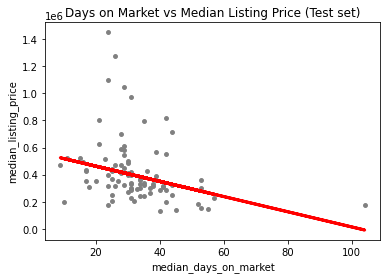

In [32]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Days on Market vs Median Listing Price (Test set)')
plot_test.xlabel('median_days_on_market')
plot_test.ylabel('median_listing_price')
plot_test.show()

# does not fit well

In [33]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [34]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-5609.47357388]]
Mean squared error:  52110359624.46615
R2 score:  0.06729301815520239


In [35]:
y_predicted

array([[356780.75354314],
       [278248.12350881],
       [367999.7006909 ],
       [424094.4364297 ],
       [412875.48928194],
       [401656.54213418],
       [407266.01570806],
       [440922.85715134],
       [401656.54213418],
       [440922.85715134],
       [401656.54213418],
       [418484.96285582],
       [396047.0685603 ],
       [412875.48928194],
       [373609.17426478],
       [379218.64783866],
       [429703.91000358],
       [474579.69859462],
       [407266.01570806],
       [429703.91000358],
       [418484.96285582],
       [401656.54213418],
       [379218.64783866],
       [429703.91000358],
       [457751.27787298],
       [401656.54213418],
       [278248.12350881],
       [384828.12141254],
       [278248.12350881],
       [362390.22711702],
       [401656.54213418],
       [384828.12141254],
       [390437.59498642],
       [480189.1721685 ],
       [418484.96285582],
       [418484.96285582],
       [435313.38357746],
       [328733.38567373],
       [3287

In [36]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,565000,356780.753543
1,299900,278248.123509
2,299000,367999.700691
3,350000,424094.436430
4,325000,412875.489282
5,419900,401656.542134
6,395000,407266.015708
7,1450000,440922.857151
8,330000,401656.542134
9,1098000,440922.857151


In [37]:
# Predict.

y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [38]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [39]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-5609.47357388]]
Mean squared error:  35917867295.10306
R2 score:  0.08451729000272967


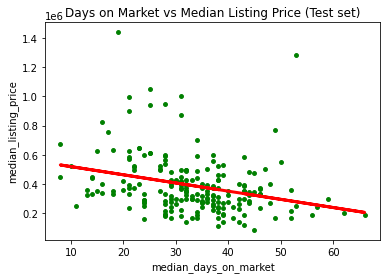

In [40]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Days on Market vs Median Listing Price (Test set)')
plot_test.xlabel('median_days_on_market')
plot_test.ylabel('median_listing_price')
plot_test.show()

# Days on market is not a good predictor of median listing price. This would lead me to think that if I isolate the price ranges DOM might be affecting the higher or lower range more. 